In [87]:
from plotnine import ggplot, aes, labels, scales
from plotnine.geoms import geom_bar
import arrow
import dfply
import tidypython
from itables import init_notebook_mode
from itables import show
import pandas as pd
from datetime import datetime
import numpy as np

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [5]:
# Create list of colors to be used in plots

colors = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600']

## Load Data

Load data into DataFrames. Create columns for each element of the Date/Time information.

In [10]:
# Load data into DataFrames and then concatenate DFs into one

apr_data = pd.read_csv('data/uber-raw-data-apr14.csv')
may_data = pd.read_csv('data/uber-raw-data-may14.csv')
jun_data = pd.read_csv('data/uber-raw-data-jun14.csv')
jul_data = pd.read_csv('data/uber-raw-data-jul14.csv')
aug_data = pd.read_csv('data/uber-raw-data-aug14.csv')
sep_data = pd.read_csv('data/uber-raw-data-sep14.csv')
jun_data.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [11]:
jun_data.shape

(663844, 4)

In [12]:
data = pd.concat([apr_data, may_data, jun_data, jul_data, aug_data, sep_data])
data.shape

(4534327, 4)

In [14]:
# Convert date/time info into datetime dtype

data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [19]:
# Create time column

def get_time(date_time):
    return date_time.strftime('%H:%M:%S')

data['Time'] = data['Date/Time'].map(get_time)
data.head()

,Date/Time,Lat,Lon,Base,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00


In [21]:
data['Time'] = pd.to_datetime(data.Time, format='%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Time       datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 207.6+ MB


In [27]:
# Create day, month, year, and DOW columns

data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month
data['Year'] = data['Date/Time'].dt.year
data['Day_of_Week'] = data['Date/Time'].dt.dayofweek
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1900-01-01 00:11:00,1,4,2014,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1900-01-01 00:17:00,1,4,2014,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1900-01-01 00:21:00,1,4,2014,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1900-01-01 00:28:00,1,4,2014,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1900-01-01 00:33:00,1,4,2014,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Time       datetime64[ns]
 5   Day        int64         
 6   Month      int64         
 7   Year       int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 311.3+ MB


In [29]:
data['Day_Name'] = data['Day_of_Week'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1900-01-01 00:11:00,1,4,2014,1,Tue
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1900-01-01 00:17:00,1,4,2014,1,Tue
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1900-01-01 00:21:00,1,4,2014,1,Tue
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1900-01-01 00:28:00,1,4,2014,1,Tue
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1900-01-01 00:33:00,1,4,2014,1,Tue


In [30]:
# Create hour, minute, second columns

data['hour'] = data['Date/Time'].dt.hour
data['minute'] = data['Date/Time'].dt.minute
data['second'] = data['Date/Time'].dt.second
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name,hour,minute,second
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1900-01-01 00:11:00,1,4,2014,1,Tue,0,11,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1900-01-01 00:17:00,1,4,2014,1,Tue,0,17,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1900-01-01 00:21:00,1,4,2014,1,Tue,0,21,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1900-01-01 00:28:00,1,4,2014,1,Tue,0,28,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1900-01-01 00:33:00,1,4,2014,1,Tue,0,33,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date/Time    datetime64[ns]
 1   Lat          float64       
 2   Lon          float64       
 3   Base         object        
 4   Time         datetime64[ns]
 5   Day          int64         
 6   Month        int64         
 7   Year         int64         
 8   Day_of_Week  int64         
 9   Day_Name     object        
 10  hour         int64         
 11  minute       int64         
 12  second       int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(2)
memory usage: 484.3+ MB


In [33]:
# Check for missing values

data.isnull().sum(by='hour')

Date/Time      0
Lat            0
Lon            0
Base           0
Time           0
Day            0
Month          0
Year           0
Day_of_Week    0
Day_Name       0
hour           0
minute         0
second         0
dtype: int64

## Plot trips by hour of the day

In [52]:
data['trip_count'] = 1
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name,hour,minute,second,trip_count


In [61]:
hour_data = data.groupby(by='hour').sum().reset_index()
hour_data = hour_data[['hour', 'trip_count']]
hour_data

hour,trip_count


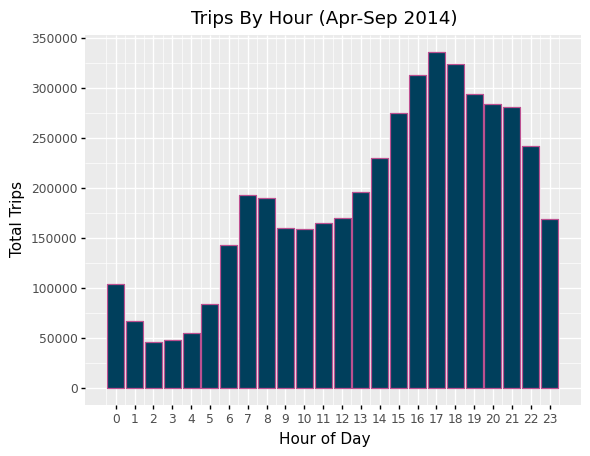

<ggplot: (-9223371896284987792)>

In [85]:
ggplot(hour_data, aes('hour', 'trip_count')) + \
geom_bar(data=hour_data, stat='identity', fill='#003f5c', color='#bc5090') + \
labels.ggtitle('Trips By Hour (Apr-Sep 2014)') + labels.xlab('Hour of Day') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 24)) + \
scales.scale_y_continuous(breaks=range(0, 400000, 50000))

In [90]:
month_hour = data.groupby(by=['Month', 'hour']).sum().reset_index()
month_hour = month_hour[['Month', 'hour', 'trip_count']]
month_hour

Month,hour,trip_count


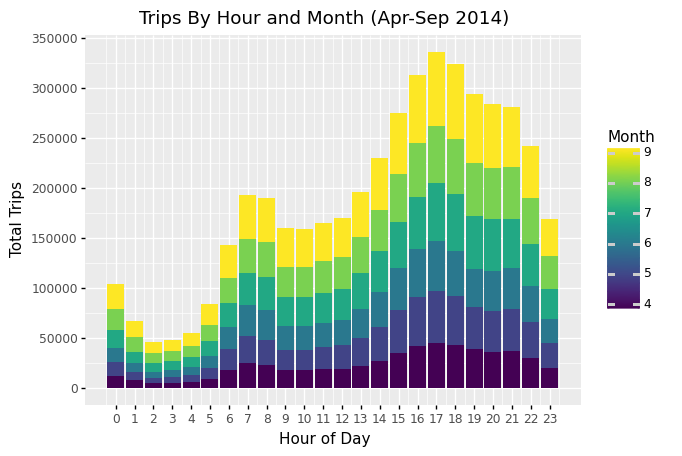

<ggplot: (-9223371896284021232)>

In [91]:
ggplot(month_hour, aes('hour', 'trip_count', fill='Month')) + \
geom_bar(stat='identity') + \
labels.ggtitle('Trips By Hour and Month (Apr-Sep 2014)') + labels.xlab('Hour of Day') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 24)) + \
scales.scale_y_continuous(breaks=range(0, 400000, 50000))

## Plot trips by day

In [92]:
day_data = data.groupby(by=['Day']).sum().reset_index()
day_data = day_data[['Day', 'trip_count']]
day_data

Day,trip_count
